In [106]:
import pandas as pd
data = pd.read_csv('data+.csv')
data

,Index,T(K),Integration Time(ns),Maximum,Filename,Scale Factor,Scale Factor_,A1,B1,C1,A2,B2,C2,time
0,40000,85.104240,189000,44906,sp_00040000.sp,1.0,1.000000,40766.670243,1.832329,0.242219,14509.601990,2.470929,-0.044194,0.0
1,40001,85.104240,189000,44914,sp_00040001.sp,1.0,1.000000,40750.334563,1.832395,-0.242188,14523.769709,2.470980,-0.044233,0.0
2,40002,85.104240,189000,44972,sp_00040002.sp,1.0,1.000000,40752.380175,1.832317,-0.242102,14518.843162,2.470938,-0.044176,1.0
3,40003,85.104240,189000,44966,sp_00040003.sp,1.0,1.000000,40772.963380,1.832326,-0.242224,14507.076815,2.470963,-0.044298,1.0
4,40004,85.104240,189000,44944,sp_00040004.sp,1.0,1.000000,40760.665491,1.832378,-0.242099,14501.070953,2.470956,-0.044221,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33031,73031,270.605904,295000,42295,sp_00073031.sp,1.0,1.560847,24050.492992,1.790072,0.242859,11101.840651,2.440609,0.045353,8512.0
33032,73032,270.631720,295000,42157,sp_00073032.sp,1.0,1.560847,24021.346810,1.790090,0.242433,11085.750082,2.440607,0.045202,8512.0
33033,73033,270.631720,295000,42157,sp_00073033.sp,1.0,1.560847,24019.631159,1.790078,0.242491,11055.033872,2.440621,0.045216,8513.0
33034,73034,270.605904,295000,42077,sp_00073034.sp,1.0,1.560847,24024.991589,1.790130,0.242479,11115.846743,2.440599,0.045035,8513.0


# A1

In [107]:
df = data

In [108]:
df['A1'].loc[7812:7815]

7812    35888.578976
7813    35872.224408
7814    35418.420098
7815    35417.133973
Name: A1, dtype: float64

In [109]:
df['A1'].loc[7814:18118] = df['A1'].loc[7814:18118] + (35872.224408-35418.420098)

C:\Users\ivan\AppData\Local\Temp\ipykernel_8716\2006279733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A1'].loc[7814:18118] = df['A1'].loc[7814:18118] + (35872.224408-35418.420098)


In [110]:
df['A1'].loc[18115:18120]

18115    28993.016454
18116    29006.093708
18117    29011.192756
18118    29017.363368
18119    28193.926602
18120    28197.623694
Name: A1, dtype: float64

In [111]:
df['A1'].loc[18119:df.shape[0]] = df['A1'].loc[18119:df.shape[0]] + (29017.363368-28193.926602)

C:\Users\ivan\AppData\Local\Temp\ipykernel_8716\276788847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A1'].loc[18119:df.shape[0]] = df['A1'].loc[18119:df.shape[0]] + (29017.363368-28193.926602)


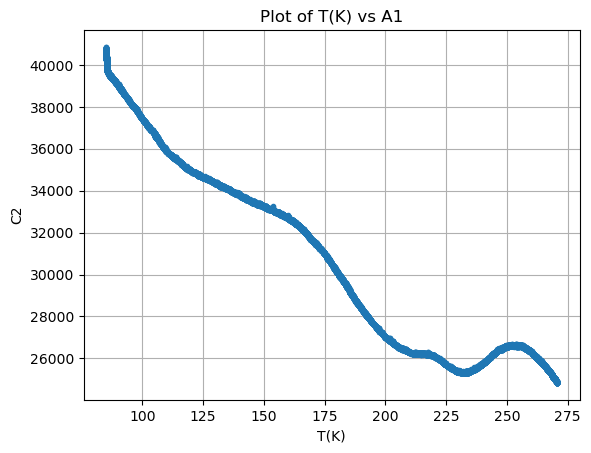

In [112]:
import matplotlib.pyplot as plt

plt.figure()  # Создаем новый рисунок
plt.plot(df['T(K)'], df['A1'], '.')  # Построение графика
plt.xlabel('T(K)')
plt.ylabel(column_title)
plt.title(f'Plot of T(K) vs A1')
plt.grid(True)
plt.show()


In [113]:
df_new['A1'] = df['A1']

# A2

In [86]:
import numpy as np

df = data
# Вычисляем межквартильное расстояние
Q1 = df['A2'].quantile(0.25)
Q3 = df['A2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 0.9 * IQR
upper_bound = Q3 + 0.9 * IQR

# Удаляем выбросы
df = df[(df['A2'] >= lower_bound) & (df['A2'] <= upper_bound)]

In [87]:
# Определяем границы температуры
T_lower = 125 - 10
T_upper = 125 + 10

# Вычисляем межквартильное расстояние для столбца 'A2' в указанном диапазоне температуры
Q1 = df[(df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper)]['A2'].quantile(0.25)
Q3 = df[(df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper)]['A2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов для указанного диапазона температуры
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем выбросы в указанном диапазоне температуры
df = df[~((df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper) & ((df['A2'] < lower_bound) | (df['A2'] > upper_bound)))]


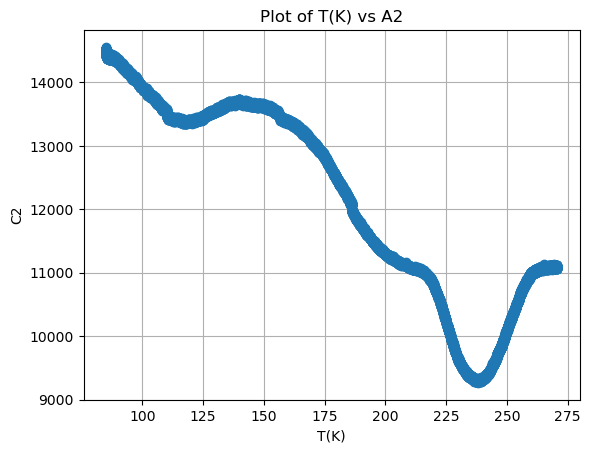

In [88]:
plt.figure()  # Создаем новый рисунок
plt.plot(df['T(K)'], abs(df['A2']), 'o')  # Построение графика
plt.xlabel('T(K)')
plt.ylabel(column_title)
plt.title(f'Plot of T(K) vs A2')
plt.grid(True)
plt.show()

In [93]:
df_new['A2'] = df['A2']

# B1

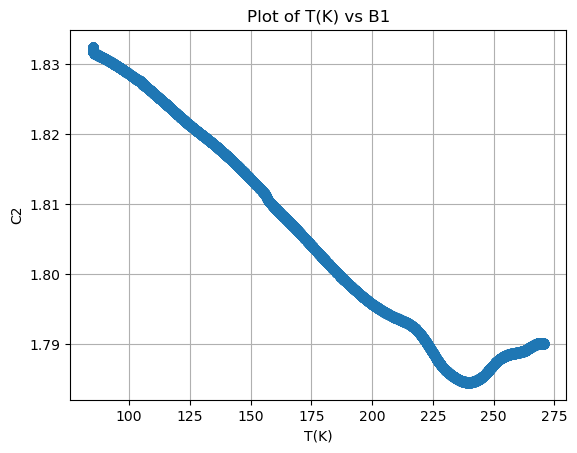

In [41]:
import matplotlib.pyplot as plt

plt.figure()  # Создаем новый рисунок
plt.plot(df['T(K)'], df['B1'], 'o')  # Построение графика
plt.xlabel('T(K)')
plt.ylabel(column_title)
plt.title(f'Plot of T(K) vs B1')
plt.grid(True)
plt.show()

In [92]:
df_new['B1'] = df['B1']

# B2

In [44]:
import numpy as np

df = data
# Вычисляем межквартильное расстояние
Q1 = df['B2'].quantile(0.25)
Q3 = df['B2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Удаляем выбросы
df = df[(df['B2'] >= lower_bound) & (df['B2'] <= upper_bound)]

In [46]:
# Определяем границы температуры
T_lower = 125 - 10
T_upper = 125 + 10

# Вычисляем межквартильное расстояние для столбца 'A2' в указанном диапазоне температуры
Q1 = df[(df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper)]['B2'].quantile(0.25)
Q3 = df[(df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper)]['B2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов для указанного диапазона температуры
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем выбросы в указанном диапазоне температуры
df = df[~((df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper) & ((df['B2'] < lower_bound) | (df['B2'] > upper_bound)))]

In [89]:
# Определяем границы температуры
T_lower = 175 - 10
T_upper = 175 + 10

# Вычисляем межквартильное расстояние для столбца 'A2' в указанном диапазоне температуры
Q1 = df[(df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper)]['B2'].quantile(0.25)
Q3 = df[(df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper)]['B2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов для указанного диапазона температуры
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем выбросы в указанном диапазоне температуры
df = df[~((df['T(K)'] >= T_lower) & (df['T(K)'] <= T_upper) & ((df['B2'] < lower_bound) | (df['B2'] > upper_bound)))]

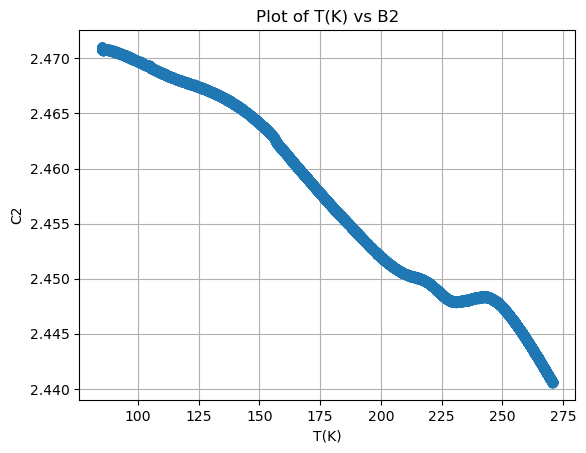

In [90]:
import matplotlib.pyplot as plt

plt.figure()  # Создаем новый рисунок
plt.plot(df['T(K)'], df['B2'], 'o')  # Построение графика
plt.xlabel('T(K)')
plt.ylabel(column_title)
plt.title(f'Plot of T(K) vs B2')
plt.grid(True)
plt.show()

In [91]:
df_new['B2'] = df['B2']

# C1

In [72]:
df = data
df['C1'] = abs(df['C1'])

In [75]:
df['C1'].loc[7812:7815]

7812    0.242184
7813    0.242353
7814    0.243102
7815    0.242921
Name: C1, dtype: float64

In [76]:
df['C1'].loc[7814:18118] = df['C1'].loc[7814:18118] - (0.243102-0.242353)

C:\Users\ivan\AppData\Local\Temp\ipykernel_8716\3834168377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C1'].loc[7814:18118] = df['C1'].loc[7814:18118] - (0.243102-0.242353)


In [74]:
df['C1'].loc[18115:18120]

18115    0.241818
18116    0.241871
18117    0.241879
18118    0.241772
18119    0.242476
18120    0.242556
Name: C1, dtype: float64

In [79]:
df['C1'].loc[18119:df.shape[0]] = df['C1'].loc[18119:df.shape[0]] - (0.242476-0.241772)

C:\Users\ivan\AppData\Local\Temp\ipykernel_8716\2711231026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C1'].loc[18119:df.shape[0]] = df['C1'].loc[18119:df.shape[0]] - (0.242476-0.241772)


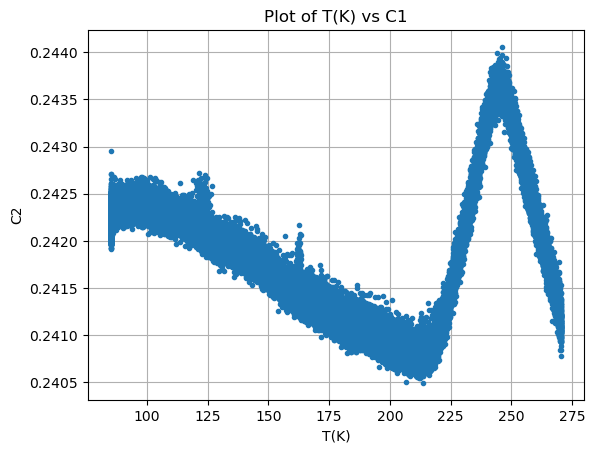

In [81]:
plt.figure()  # Создаем новый рисунок
plt.plot(df['T(K)'], df['C1'], '.')  # Построение графика
plt.xlabel('T(K)')
plt.ylabel(column_title)
plt.title(f'Plot of T(K) vs C1')
plt.grid(True)
plt.show()

In [82]:
df_new = pd.DataFrame()

In [83]:
df_new['C1'] = df['C1']

# C2

In [53]:
import numpy as np

df = data
df['C2'] = abs(df["C2"])
# Вычисляем межквартильное расстояние
Q1 = df['C2'].quantile(0.25)
Q3 = df['C2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Удаляем выбросы
df = df[(df['C2'] >= lower_bound) & (df['C2'] <= upper_bound)]

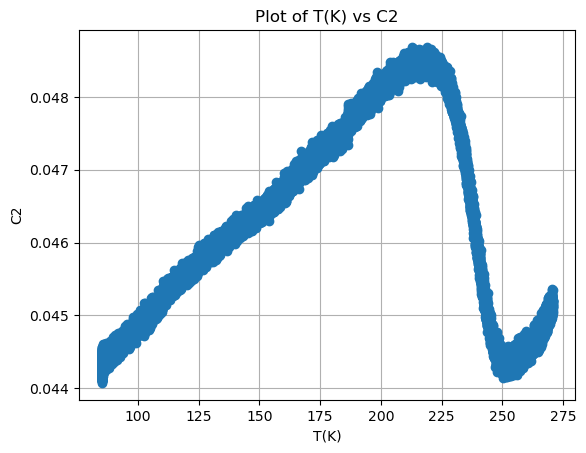

In [94]:
plt.figure()  # Создаем новый рисунок
plt.plot(df['T(K)'], abs(df['C2']), 'o')  # Построение графика
plt.xlabel('T(K)')
plt.ylabel(column_title)
plt.title(f'Plot of T(K) vs C2')
plt.grid(True)
plt.show()

In [95]:
df_new['C2'] = abs(df['C2'])

In [116]:
df_new['T(K)'] = df['T(K)']

In [119]:
df_new['time'] = df['time']

In [120]:
df_new['Maximum'] = df['Maximum']

In [123]:
df_new.to_csv('result.csv', index=False)

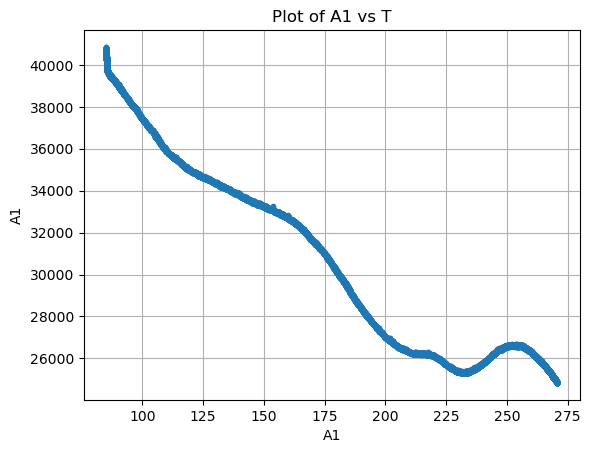

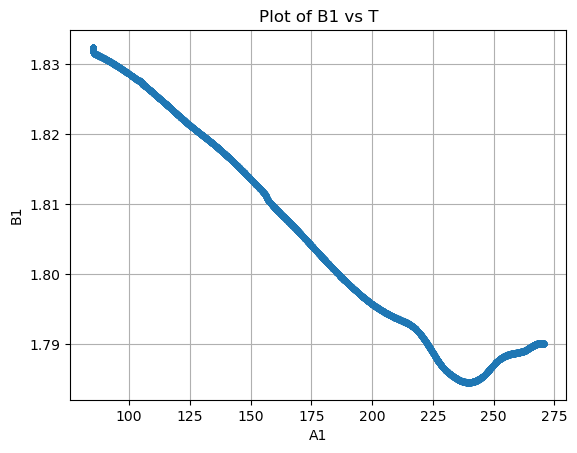

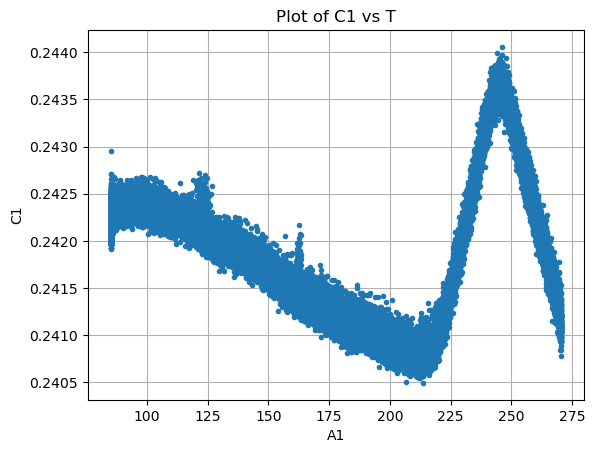

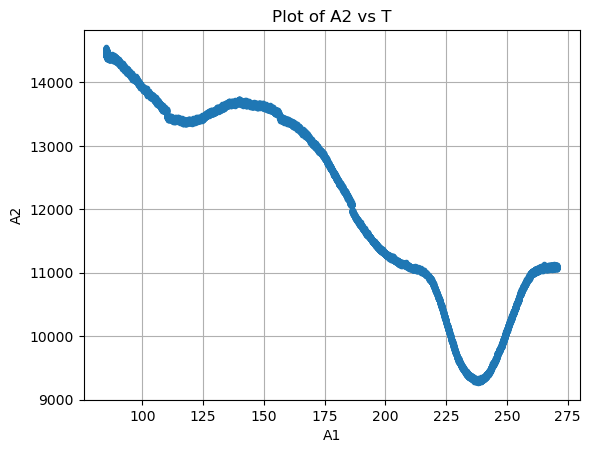

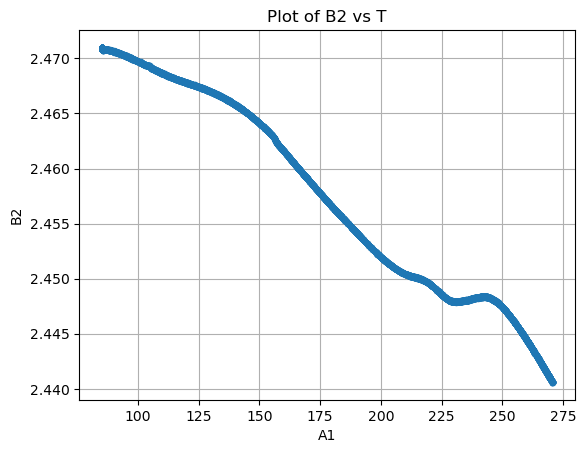

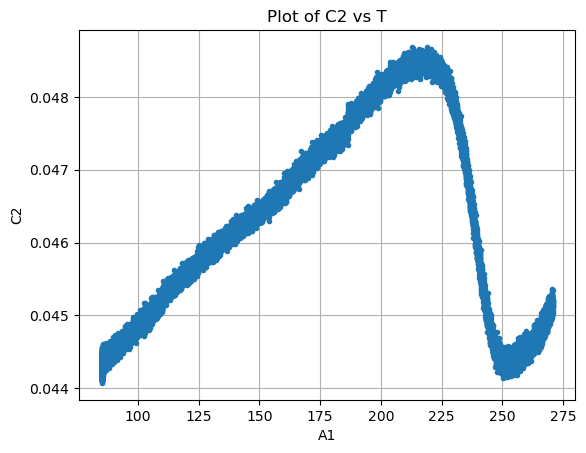

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df_new = pd.read_csv('result.csv')

# Список заголовков для каждого столбца
column_titles = ['A1', 'B1', 'C1', 'A2', 'B2', 'C2']

# Построение графиков
for column_title in column_titles:
    plt.figure()  # Создаем новый рисунок
    plt.plot(df_new['T(K)'], df_new[column_title], '.')  # Построение графика
    plt.xlabel('A1')
    plt.ylabel(column_title)
    plt.title(f'Plot of {column_title} vs T')
    plt.grid(True)
    plt.savefig(f'{column_title}.pdf')
    plt.show()


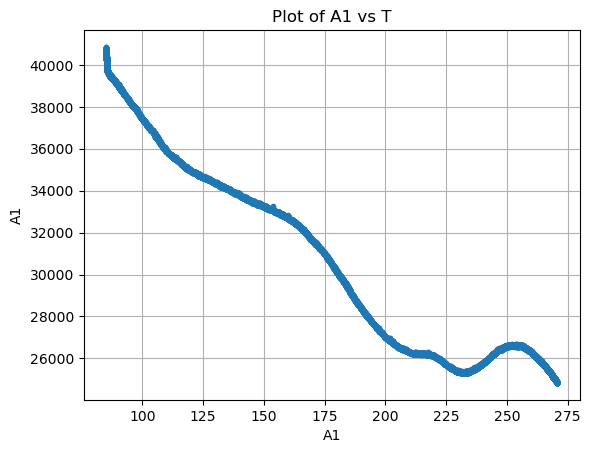

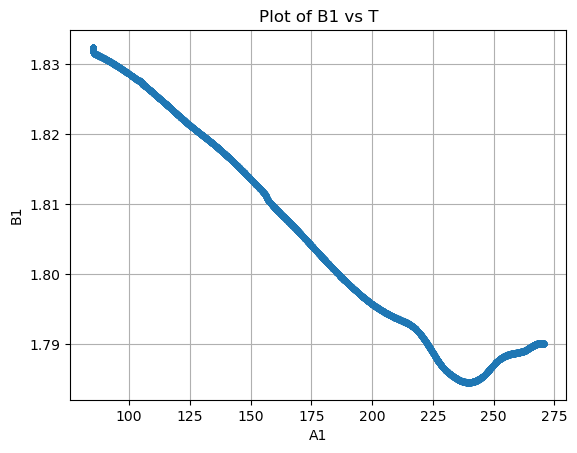

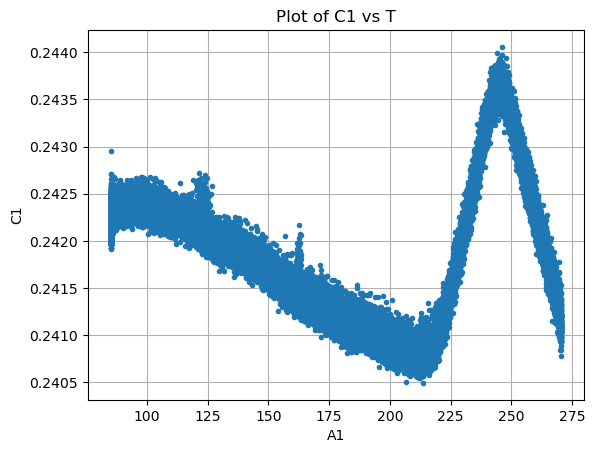

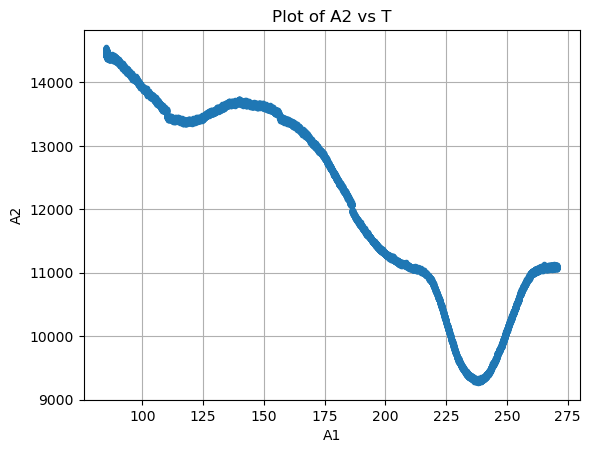

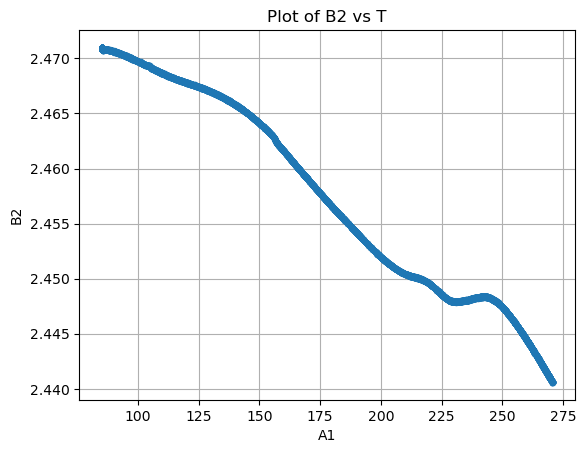

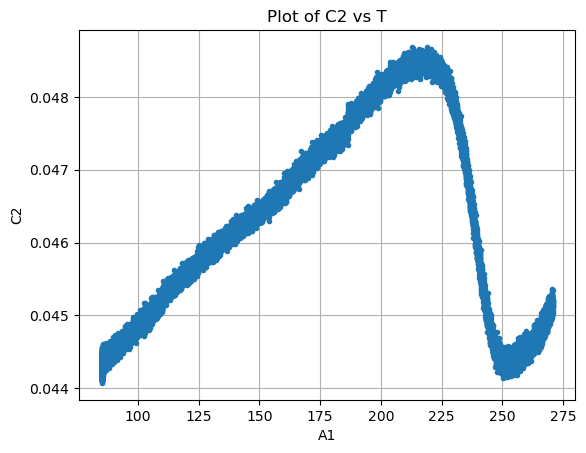

In [3]:
# Построение графиков
for column_title in column_titles:
    plt.figure()  # Создаем новый рисунок
    plt.plot(df_new['T(K)'], df_new[column_title], '.')  # Построение графика
    plt.xlabel('A1')
    plt.ylabel(column_title)
    plt.title(f'Plot of {column_title} vs T')
    plt.grid(True)
    plt.savefig(f'{column_title}.jpg')
    plt.show()
